In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [97]:
bank_dataset=pd.read_csv('../ClassificationDataSet/bank-additional-full.csv')

In [98]:
bank_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [99]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [100]:
bank_dataset['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [101]:
bank_dataset['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [102]:
bank_dataset['y'].unique()

array(['no', 'yes'], dtype=object)

In [103]:
newBankData=pd.get_dummies(bank_dataset['y'])
newBankData.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [104]:
'''data=[bank_dataset['age'],bank_dataset['campaign']]
newBankData=pd.DataFrame(data)
newBankData=newBankData.transpose()
newBankData.head()'''

"data=[bank_dataset['age'],bank_dataset['campaign']]\nnewBankData=pd.DataFrame(data)\nnewBankData=newBankData.transpose()\nnewBankData.head()"

In [105]:
#bank_datasetEncoded=pd.get_dummies(bank_dataset['age','campaign'])
def one_hot_encode(dataframe, var, top_x_value):
    listnew=[]
    #fetching & storing top 10 most frequent labels of given variable 
    topLabels=[x for x in dataframe[var].value_counts().sort_values(ascending=False).head(top_x_value).index]
    print(topLabels)
    
    #Using np.where to encode with 1 if current label(iterator value) matches with label in that particular variable.
    for labels in topLabels:
        head=var+"_"+str(labels)
        newBankData[head]=np.where(dataframe[var]==labels,1,0)
              

In [106]:
one_hot_encode(bank_dataset,'age',10)
newBankData.head()

[31, 32, 33, 36, 35, 34, 30, 37, 29, 39]


,no,yes,age_31,age_32,age_33,age_36,age_35,age_34,age_30,age_37,age_29,age_39
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [107]:
one_hot_encode(bank_dataset,'campaign',10)
newBankData.head()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,no,yes,age_31,age_32,age_33,age_36,age_35,age_34,age_30,age_37,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [108]:
newBankData.head()

,no,yes,age_31,age_32,age_33,age_36,age_35,age_34,age_30,age_37,...,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [110]:
from sklearn.model_selection import train_test_split

y=bank_dataset['y']
# Spliting the data in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(newBankData,y,test_size=0.3, random_state=0)
# Checking the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (28831, 22)
Shape of y_train: (28831,)
Shape of X_test: (12357, 22)
Shape of y_test: (12357,)


In [111]:
# Importing the required class.
from sklearn.linear_model import LogisticRegression

# Instantiating the required algorithm for model building.
model = LogisticRegression()

# Building the model based on the training data.
model.fit(X_train,y_train)

# Getting the accuracy on training data
train_accuracy = model.score(X_train,y_train)
print("Train accuracy = ", train_accuracy)

# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Test accuracy = ", test_accuracy)



Train accuracy =  1.0
Test accuracy =  1.0


### Measuring Model Performance using Confusion Matrix
#### Confusion matrix helps in assessing how good a model is by comparing the actual target values with the predicted target values.

In [113]:
# Predicting targets based on the model built
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Importing the required function
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix on the training data
train_conf_matrix = confusion_matrix(y_train,train_predictions)

# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)




,no,yes
no,25579,0
yes,0,3252


In [114]:
# Creating a confusion matrix on the training data
test_conf_matrix = confusion_matrix(y_test,test_predictions)
# Converting the train_conf_matrix into a DataFrame for better readability
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)


,no,yes
no,10969,0
yes,0,1388


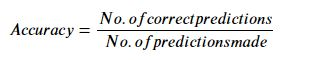


#### Accuracy can be computed from Confusion Matrix as well using the above expression:

In [115]:
# Calculating train accuracy from confusion matrix
train_correct_predictions = train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions = train_conf_matrix.sum()
train_accuracy = train_correct_predictions/train_total_predictions
print(train_accuracy)


1.0


In [116]:
# Calculating test accuracy from confusion matrix
test_correct_predictions = test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions = test_conf_matrix.sum()
test_accuracy = test_correct_predictions/total_predictions
print(test_accuracy)


1.0


#### Precision: The precision for a class A indicates how accurate the model is in identifying class A. It is given by the below formula -

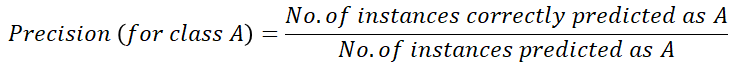

 

#### Recall: The recall for a class A indicates how good the model is in fetching/retrieving instances of class A. It is given by the below formula -

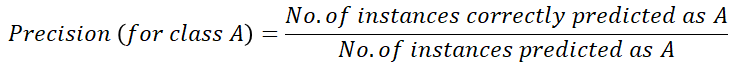

 

#### To evaluate a model with a single metric based on precision and recall, F1-Score can be used.
#### F1-score: This metric is the harmonic mean of precision and recall and can indicate how good the model is in classifying instances of a particular class. It is defined as follows -

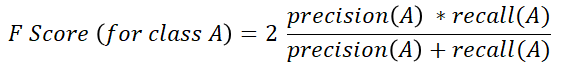

#### We can also get the Precision, Recall and F1-scores using sklearn as shown below -

In [117]:
# Importing the required function
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_predictions))


              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10969
         yes       1.00      1.00      1.00      1388

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

